In [55]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt

In [71]:

from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


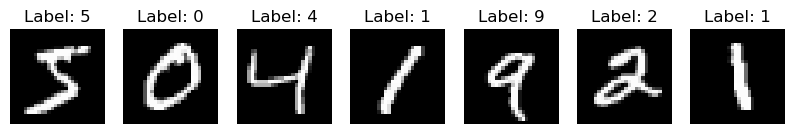

In [72]:
fig, axes = plt.subplots(1,7, figsize=(10,5))

for i in range(7):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f'Label: {y_train[i]}')
    axes[i].axis('Off')
plt.show()

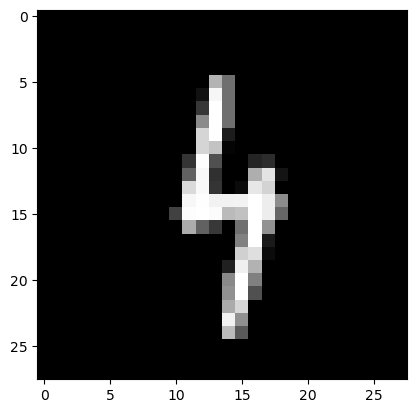

In [73]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Pick a random image
idx = random.randint(0, len(X_train) - 1)
image = X_train[idx, :]

plt.imshow(image, cmap='gray')




In [74]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test  = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0


In [75]:
print('X_train Shape: ', X_train.shape)
print('X_test Shape: ', X_test.shape)
print('y_train Shape: ', y_train.shape)
print('y_test Shape: ', y_test.shape)

X_train Shape:  (60000, 28, 28, 1)
X_test Shape:  (10000, 28, 28, 1)
y_train Shape:  (60000,)
y_test Shape:  (10000,)


In [76]:
print("Sample Labels: ", y_train[: 10])

Sample Labels:  [5 0 4 1 9 2 1 3 1 4]


In [77]:
model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((3,3)),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((3,3)),

        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax'),

])

In [78]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [79]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,002 (207.04 KB)

 Trainable params: 53,002 (207.04 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 30ms/step - accuracy: 0.9413 - loss: 0.1971 - val_accuracy: 0.9755 - val_loss: 0.0795
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9802 - loss: 0.0621 - val_accuracy: 0.9845 - val_loss: 0.0443
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9862 - loss: 0.0437 - val_accuracy: 0.9886 - val_loss: 0.0368
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9889 - loss: 0.0346 - val_accuracy: 0.9877 - val_loss: 0.0358
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9910 - loss: 0.0281 - val_accuracy: 0.9892 - val_loss: 0.0359


In [81]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9892 - loss: 0.0359
0.9891999959945679


In [83]:
if True:
    model.save('mnist_model.keras')
    print("You've successfully saved the model")
else:
    print('Unable to save the model')



You've successully saved the model


In [84]:
from tensorflow.keras.models import load_model
model = load_model('mnist_model.keras')

In [91]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained MNIST model
model = load_model('mnist_model.keras') `

# Start webcam
cap = cv2.VideoCapture(0)
print("Press ESC to quit")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Flip the frame horizontally (optional, feels more natural)
    frame = cv2.flip(frame, 1)

    # Define Region of Interest (ROI) rectangle (center area)
    h, w, _ = frame.shape
    box_size = 200  # size of the square detection area
    x1 = (w // 2) - (box_size // 2)
    y1 = (h // 2) - (box_size // 2)
    x2 = x1 + box_size
    y2 = y1 + box_size

    # Draw the detection box
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    roi = frame[y1:y2, x1:x2]

    # Convert ROI to grayscale
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Preprocess image like MNIST
    img = cv2.bitwise_not(gray)             # invert colors
    img = cv2.resize(img, (28, 28))         # resize to 28x28
    img = img.astype('float32') / 255.0     # normalize
    img_input = img.reshape(1, 28, 28, 1)

    # Predict
    prediction = model.predict(img_input, verbose=0)
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    # Show prediction and confidence
    text = f"Digit: {predicted_label} ({confidence:.2f}%)"
    cv2.putText(frame, text, (10, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the live feed
    cv2.imshow("Real-Time Digit Recognition", frame)

    # Exit on ESC key
    key = cv2.waitKey(1)
    if key % 256 == 27:
        print("Exiting...")
        break

cap.release()
cv2.destroyAllWindows()


Press ESC to quit



KeyboardInterrupt

